                        What makes an animal more desirable in the adoption process?

The aim of this project is to find out which are the most relevant features when considering the rate of animal adoption at Austin Animal Center . Some of the essential questions for developing this project are related to the animals' income type (how the animal has come to live in the Shelter), outcome condition (The state of the animal upon admition to the shelter),	animal type (Dog, cat, ect.),	sex upon outcome (animal's sex), age upon intake(age upon admition to the shelter),	breed,	color,	datetime outcome (The date when the animal leaves the shelter),	date_of_birth,	outcome_type(adopted or not adopted),	age_upon_outcome,	years_in_shelter.

The dataset used for this analysis was taken from https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm. The data consists of the Animal Center Intakes from Oct, 1st 2013 to present. Intakes represent the status of animals as they arrive at the Animal Center. The data set contains 124120 rows and more than 30 columns of which not all are relevant to this EDA. Only the features that have information to answer the questions to achieve the goal of the project were deployed. The most powerful tools for data analysis used in this project are the packages Numpy and Pandas, and to visualize and explore the data: Matplotlib and Seaborn.

TABLE OF CONTENTS
1. Reading the Dataset.
This part presents the steps to read the dataset about Austin animal shelter.

2. Data Preparation: Cleaning and Formatting.
The data preparation process is essential in any data analysis project since it allows researchers to identify and deal with aspects that might interfere with quantitative analysis or result in inefficient coding. This process often consumes up to 80% of the total duration of a data analysis project. As a result, inconsistent, invalid, and missing values have to be dealt with.

3. Exploratory Data Analysis (EDA) and Visualization.
This stage gives globally applicable information about the various columns of the dataset before posing questions that may help achieve the project's goal. Initial analyses were carried out to start identifying patterns, formulating hypotheses, and validating initial assumptions. 

The following questions and hypotheses were created to construct this project:

* Does age affect animal's adoption rate?
* Does animal's health condition upon entering shelter have an impact on its adoption rate?
* Does animal's reason for entering shelter have an impact on its adoption rate?
* Does animal's type  have an impact on its adoption rate?
* Is there a difference between adoption rate of spayed and unspayed females? 
* Is there a difference between adoption rate of neutered and not neutered males? Finally we can ask 
* Is there a difference between males and females when it comes to adoption rate?
* Does the color of an animal affects its adoption chances?
* Does the breed of an animal affects its adoption chances?
* Does the time spent in the shelter affect animal's adoption chances?
4. Inferences and Conclusions.
Although all findings and solutions are discussed in the preceding part in accordance with each issue, the most important insights are also presented in a condensed form in this section.



                                                1. Reading the Dataset

We'll start with importing all the neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

Now we can import the first csv file with the animal shelter intake information. With this we can start identifying the most usefull information

In [136]:

df = pd.read_csv('Austin_Animal_Center_Intakes.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [137]:
df_1 = pd.read_csv('Austin_Animal_Center_Outcomes.csv')


In [138]:
df_1.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


                                        2. Data Preparation: Cleaning and Formatting.

Now, let's see some additional information. Looking at the tables below, if we check the number of non-null elements in each column, we can see that several columns, such as name, have multiple null or NaN values.. 

In [139]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [140]:
df.shape

(124120, 12)

In [141]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Date of Birth     124491 non-null  object
 5   Outcome Type      124471 non-null  object
 6   Outcome Subtype   57308 non-null   object
 7   Animal Type       124491 non-null  object
 8   Sex upon Outcome  124490 non-null  object
 9   Age upon Outcome  124486 non-null  object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


We also have to make sure there are no duplicates in the data set

In [142]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124101 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124101 non-null  object
 1   Name              85055 non-null   object
 2   DateTime          124101 non-null  object
 3   MonthYear         124101 non-null  object
 4   Found Location    124101 non-null  object
 5   Intake Type       124101 non-null  object
 6   Intake Condition  124101 non-null  object
 7   Animal Type       124101 non-null  object
 8   Sex upon Intake   124100 non-null  object
 9   Age upon Intake   124101 non-null  object
 10  Breed             124101 non-null  object
 11  Color             124101 non-null  object
dtypes: object(12)
memory usage: 12.3+ MB


In [143]:
df_1 = df_1.drop_duplicates()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124474 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124474 non-null  object
 1   Name              85454 non-null   object
 2   DateTime          124474 non-null  object
 3   MonthYear         124474 non-null  object
 4   Date of Birth     124474 non-null  object
 5   Outcome Type      124454 non-null  object
 6   Outcome Subtype   57299 non-null   object
 7   Animal Type       124474 non-null  object
 8   Sex upon Outcome  124473 non-null  object
 9   Age upon Outcome  124469 non-null  object
 10  Breed             124474 non-null  object
 11  Color             124474 non-null  object
dtypes: object(12)
memory usage: 12.3+ MB


                                                2.1 Merging the data

Now we can merge both dfs into one with left outer join. Because of that we have to see if the Animal ID is unique for each animal

In [144]:
len(df_1['Animal ID'].unique())


111309

df_1 has 124474 rows and there are 111309 unique Animal IDs in this dataframe. Looks like it is not unique for each animal. We can drop the duplicates. 

In [145]:

df = df.drop_duplicates(subset=['Animal ID'])
df_1 = df_1.drop_duplicates(subset=['Animal ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110926 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         110926 non-null  object
 1   Name              72275 non-null   object
 2   DateTime          110926 non-null  object
 3   MonthYear         110926 non-null  object
 4   Found Location    110926 non-null  object
 5   Intake Type       110926 non-null  object
 6   Intake Condition  110926 non-null  object
 7   Animal Type       110926 non-null  object
 8   Sex upon Intake   110925 non-null  object
 9   Age upon Intake   110926 non-null  object
 10  Breed             110926 non-null  object
 11  Color             110926 non-null  object
dtypes: object(12)
memory usage: 11.0+ MB


It's time to do the left join on Animal ID.

In [146]:
result = pd.merge(df,df_1, how="left", on=["Animal ID"])
result.head(
)


,Animal ID,Name_x,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,...,DateTime_y,MonthYear_y,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,01/08/2019 03:11:00 PM,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,07/05/2015 03:13:00 PM,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,04/21/2016 05:17:00 PM,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,...,10/21/2013 11:39:00 AM,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,07/02/2014 02:16:00 PM,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


Looking below we can see that we've ended up with 110926 data entries with 23 columns. Now it's time to drop features with no value to our study

In [147]:
result.shape

(110926, 23)

                                                2.2 Giving Format

From the given columns only those that are related to the goal of this project will be selected to continue working on them. We narrowed down our data set from 23 coulmns to 12

In [148]:
result = result.drop(['Animal Type_y','Found Location','Animal ID','Name_x',
'Name_y','Color_y','Breed_y','Outcome Subtype','Sex upon Outcome','MonthYear_y','MonthYear_x'],axis=1)
result.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 110926 entries, 0 to 110925
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   DateTime_x        110926 non-null  object
 1   Intake Type       110926 non-null  object
 2   Intake Condition  110926 non-null  object
 3   Animal Type_x     110926 non-null  object
 4   Sex upon Intake   110925 non-null  object
 5   Age upon Intake   110926 non-null  object
 6   Breed_x           110926 non-null  object
 7   Color_x           110926 non-null  object
 8   DateTime_y        110495 non-null  object
 9   Date of Birth     110495 non-null  object
 10  Outcome Type      110479 non-null  object
 11  Age upon Outcome  110490 non-null  object
dtypes: object(12)
memory usage: 11.0+ MB


Now, in order to utilise the column names as properties and benefit from them, certain special characters, such as the underscore _ must be removed. In addition, some column names include spaces between words and unessecary letters; these will be eliminated as well.

In [149]:
new_columns = list(result.columns.values)

In [150]:
for x in range(len(new_columns)):
    
    new_columns[x] = new_columns[x].lower()
    
    new_columns[x] = new_columns[x].replace(" ", "_")
    new_columns[x] = new_columns[x].strip('_y')
    new_columns[x] = new_columns[x].strip('_x')
    
new_columns

['datetime',
 'intake_type',
 'intake_condition',
 'animal_type',
 'sex_upon_intake',
 'age_upon_intake',
 'breed',
 'color',
 'datetime',
 'date_of_birth',
 'outcome_type',
 'age_upon_outcome']

In [151]:
result.columns=new_columns
result.columns

Index(['datetime', 'intake_type', 'intake_condition', 'animal_type',
       'sex_upon_intake', 'age_upon_intake', 'breed', 'color', 'datetime',
       'date_of_birth', 'outcome_type', 'age_upon_outcome'],
      dtype='object')

Turns out that there exist two datetime columns with different information. Let's rename the second one by copying the above list and simply changing the name.

In [152]:
result.columns = ['datetime',
 'income_type',
 'outcome_condition',
 'animal_type',
 'sex_upon_outcome',
 'age_upon_intake',
 'breed',
 'color',
 'datetime_outcome',
 'date_of_birth',
 'outcome_type',
 'age_upon_outcome']

                                2.3 Working with missing, incorrect, and invalid data

-- Missing values (NaN values)

First, let's change Unknown values with np.nan.

In [153]:

result_2 = result.replace("Unknown",np.nan)

Second, let's replace missing entries with NaN values. 
This way, if a pandas function is used, none of those NaN values will be taken under consideration.

In [154]:
result_2.fillna(np.nan,inplace=True)

We can now check the unique values in each feature.

As we can see below some of our features such as breed and color have many unique values. In most cases we'll only be considering top 10 most frequent 

In [155]:
result_2.describe()

,datetime,income_type,outcome_condition,animal_type,sex_upon_outcome,age_upon_intake,breed,color,datetime_outcome,date_of_birth,outcome_type,age_upon_outcome
count,110926,110926,110926,110926,100706,110926,110924,110926,110495,110495,110479,110490
unique,77612,6,10,5,4,51,2628,595,91184,7085,9,50
top,07/09/2014 12:58:00 PM,Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White,04/18/2016 12:00:00 AM,09/01/2015,Adoption,1 year
freq,63,79216,95372,59404,37614,19005,29506,11438,31,107,47894,19178




Let's look at the NaN values across the full data frame. We should see a list of columns ordered by the number of NaN values they contain.

In [156]:
result_2.isna().sum().sort_values(ascending=False)

sex_upon_outcome     10220
outcome_type           447
age_upon_outcome       436
datetime_outcome       431
date_of_birth          431
breed                    2
datetime                 0
income_type              0
outcome_condition        0
animal_type              0
age_upon_intake          0
color                    0
dtype: int64

As we can see below. None of these sums go beyond 20%. Therefore, we have no basis to drop these columns

In [157]:
perc_nan=result_2.isna().sum()/len(result_2)*100

Text(0, 0.5, '% of NaN elements')

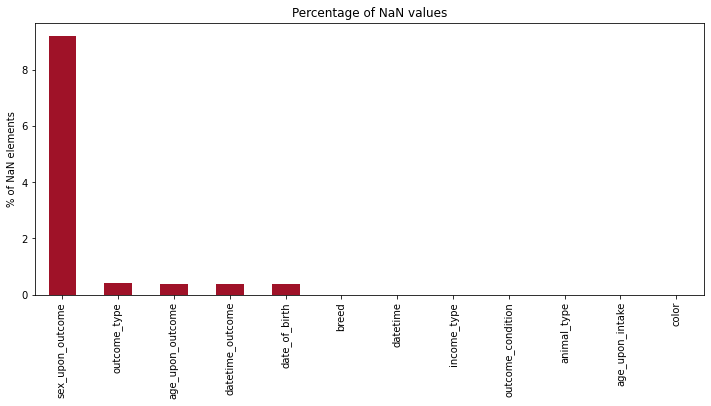

In [158]:
sns.set_palette("RdBu", 12)
plt.figure(figsize=(12,8))
ax=perc_nan[perc_nan>=0].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements')

--Incorect Data Types

We can now pass onto manipulating data types. First, let's check what we're dealing with.

In [159]:
result_2.dtypes

datetime             object
income_type          object
outcome_condition    object
animal_type          object
sex_upon_outcome     object
age_upon_intake      object
breed                object
color                object
datetime_outcome     object
date_of_birth        object
outcome_type         object
age_upon_outcome     object
dtype: object

All the date time columns need to be changed and formatted

In [160]:
result_2['datetime'] = pd.to_datetime(result_2['datetime'])
result_2['datetime_outcome'] = pd.to_datetime(result_2['datetime_outcome'])
result_2['date_of_birth'] = pd.to_datetime(result_2['date_of_birth'])


Now we can also change the age column into integer type. Anything below a year will be considered as 0

In [161]:

result_2['age_upon_outcome'] = result_2['age_upon_outcome'].map(lambda x: x.rstrip(' years'),na_action='ignore')
result_2['age_upon_outcome'] = result_2['age_upon_outcome'].map(lambda x: x.rstrip(' year'),na_action='ignore')

result_2['age_upon_intake'] = result_2['age_upon_intake'].map(lambda x: x.rstrip(' years'),na_action='ignore')
result_2['age_upon_intake'] = result_2['age_upon_intake'].map(lambda x: x.rstrip(' year'),na_action='ignore')

   
      


As we can see below, for every column that has months, days, weeks, week, day, month or d in it we will map it as 0 since it's a value below 1 year.

In [162]:
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome'].str.contains('months'), 0, result_2['age_upon_outcome'])
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome'].str.contains('days'), 0, result_2['age_upon_outcome'])
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome'].str.contains('weeks'), 0, result_2['age_upon_outcome'])
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome'].str.contains('week'), 0, result_2['age_upon_outcome'])
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome'].str.contains('day'), 0, result_2['age_upon_outcome'])
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome'].str.contains('month'), 0, result_2['age_upon_outcome'])
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome'].str.contains('d'), 0, result_2['age_upon_outcome'])



In [163]:
result_2['age_upon_intake'] = np.where(result_2['age_upon_intake'].str.contains('months'), 0, result_2['age_upon_intake'])
result_2['age_upon_intake'] = np.where(result_2['age_upon_intake'].str.contains('days'), 0, result_2['age_upon_intake'])
result_2['age_upon_intake'] = np.where(result_2['age_upon_intake'].str.contains('weeks'), 0, result_2['age_upon_intake'])
result_2['age_upon_intake'] = np.where(result_2['age_upon_intake'].str.contains('month'), 0, result_2['age_upon_intake'])
result_2['age_upon_intake'] = np.where(result_2['age_upon_intake'].str.contains('day'), 0, result_2['age_upon_intake'])
result_2['age_upon_intake'] = np.where(result_2['age_upon_intake'].str.contains('week'), 0, result_2['age_upon_intake'])
result_2['age_upon_intake'] = np.where(result_2['age_upon_intake'].str.contains('d'), 0, result_2['age_upon_intake'])

Finally we can change the data type of age columns to on integers.

In [164]:
result_2['age_upon_intake'] = result_2['age_upon_intake'].astype('int')
result_2['age_upon_outcome'] = result_2['age_upon_outcome'].astype('int')

Let's also map our dependent variable outcome_type column into 1:Adopted and 0:Not Adopted. This will help us later in analysing the data. Let's remember that there were certain animal IDs in intakes dataset that were not there in the outcomes data set. After merging these data sets animals who have not yet been adopted and haven't left the shelter yet are represented in the outcome_type as a nan value. In this situation, we cannot forget to count  them in as not adopted.

In [165]:
result_2['outcome_type'].unique()

array(['Transfer', 'Return to Owner', 'Adoption', 'Euthanasia',
       'Disposal', 'Died', 'Rto-Adopt', 'Missing', nan, 'Relocate'],
      dtype=object)

In [166]:
result_2['outcome_type'] = result_2['outcome_type'].fillna(0)
result_2['outcome_type'].unique()

array(['Transfer', 'Return to Owner', 'Adoption', 'Euthanasia',
       'Disposal', 'Died', 'Rto-Adopt', 'Missing', 0, 'Relocate'],
      dtype=object)

In [167]:
result_2['outcome_type'] = result_2['outcome_type'].map({'Transfer':0, 'Return to Owner':1, 'Adoption':1, 'Euthanasia':0,
       'Disposal':0, 'Died':0, 'Rto-Adopt':1, 'Missing':0, 'Relocate':0, 0: 0})
       
result_2['outcome_type'].unique()

array([0, 1], dtype=int64)

--Invalid Data 

As we can see below, age has a minimum value of -2 which is impossible. It must be a data entry mistake made by the shelter's employee

We can also see that 75% values are under the age of 2 for both columns. The maximum age is 25 and seem very rare, like an outlier. Outliers can be problematic because they can affect the results of an analysis.

However, they can also be informative about the data we're studying because they can reveal abnormal cases or individuals that have rare traits, in our case these are exceptionally old animals. Therefore, we will keep them in the data set.

In [168]:
result_2.describe()

,age_upon_intake,outcome_type,age_upon_outcome
count,110926.000000,110926.000000,110926.000000
mean,1.887592,0.590889,1.898338
std,2.936601,0.491672,2.951109
min,-2.000000,0.000000,-2.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000
max,25.000000,1.000000,25.000000


We will make an assumption that the employee added a minus by mistake and we will change -2 to a positive value.

In [169]:

result_2['age_upon_intake'] = np.where(result_2['age_upon_intake']<=0, result_2['age_upon_intake']*-1, result_2['age_upon_intake'])
result_2['age_upon_outcome'] = np.where(result_2['age_upon_outcome']<=0, result_2['age_upon_outcome']*-1, result_2['age_upon_outcome'])

Now we can se there are no minimum negative values

Let's save our data to csv file

In [170]:
result_2.to_csv('shelter_cleaned.csv',index=False)

In [3]:
result_2 = pd.read_csv('shelter_cleaned.csv')

                            3. Exploratory Data Analysis (EDA) and Visualization.

Let's start the analysis by answering first of our questions.

                                Q1: Does age affect animal's adoption rate?

To answer this question we need to establish a relative difference between adopted and not adopted animals per age group. First let's check the distribution of age by creating a histogram presented below.

As we can see for each age group there's more adopted than not adopted animals which is a good sign for the shelter.

Text(0.5, 0, 'age')

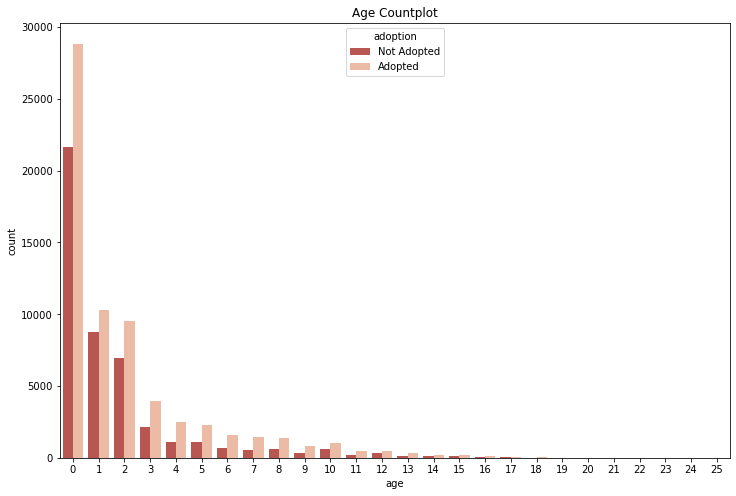

In [4]:
sns.set_palette("RdBu", 5)
plt.figure(figsize=(12,8))
g = sns.countplot(data = result_2, x = 'age_upon_intake', hue = 'outcome_type')
plt.legend(['Not Adopted',"Adopted"],title=('adoption'))
plt.title('Age Countplot')
plt.xlabel('age')


As we can see above the distribution is close to exponential. We can also check the distribution of outcome_type. As we can see below the number of Adopted and not Adopted animals seems pretty equal. 

Text(0.5, 0, 'Adoption')

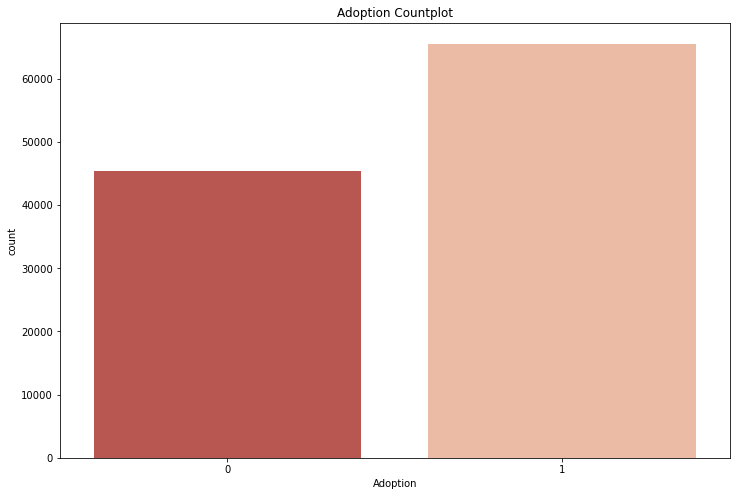

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(data = result_2, x = 'outcome_type')


plt.title('Adoption Countplot')
plt.xlabel('Adoption')

We can start preparing the data to make a percentage relative difference barplot. First we need to subtract Not adopted animals from adopted ones per age group and divide it by Not Adopted number.

In [6]:
diff = result_2[['age_upon_intake','outcome_type']]
diff = diff.groupby(['age_upon_intake','outcome_type'],as_index=False).size()


dif = diff.pivot(index='age_upon_intake', columns='outcome_type', values = 'size')
dif = dif.fillna(0)
sum_ = dif[0.0]+dif[1.0]
no = dif[0.0]
dif_1 = dif[1.0].sub(dif[0.0],fill_value=0).reset_index(name='sub_quantity')

dif = pd.concat([dif,dif_1,sum_],axis=1)
dif.columns = ['Not Adopted','Adopted','age_upon_intake', 'sub_quantity', 'sum']

dif





,Not Adopted,Adopted,age_upon_intake,sub_quantity,sum
0,21630.0,28850.0,0,7220.0,50480.0
1,8733.0,10274.0,1,1541.0,19007.0
2,6941.0,9524.0,2,2583.0,16465.0
3,2157.0,3986.0,3,1829.0,6143.0
4,1105.0,2470.0,4,1365.0,3575.0
5,1093.0,2273.0,5,1180.0,3366.0
6,664.0,1585.0,6,921.0,2249.0
7,533.0,1443.0,7,910.0,1976.0
8,604.0,1364.0,8,760.0,1968.0
9,301.0,817.0,9,516.0,1118.0


As we can see up until age of 9 the percent relative difference between adopted and not adopted rises. At the age of 9 the count of adopted animals is 184% higher than that of the not adopted ones. We cannot however compare these percentages across age group since relative difference is very sensitive to sample size. However we can conclude that most of the animals do end up getting adopted no matter their age. Some Age groups such as ages 7 and 8 have similar sample sizes so we can compare them easily. For example, animals aged 8 are less likely to get adopted than animals aged 7.  The same situation happens with ages 4 and 5, 14 and 15, 11 and 13. As a matter of fact we could split the age groups into equal groups to compare them across groups. Nevertheless, based on the previous sentence we can assume that the older the animal the smaller the chances of adoption.

Text(0, 0.5, 'percent difference [%]')

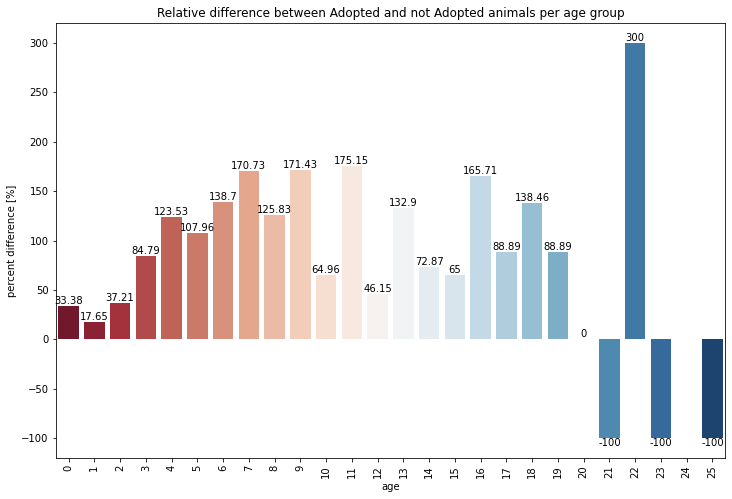

In [7]:
sns.set_palette("RdBu", 26)
plt.figure(figsize=(12,8))
g = sns.barplot(data=dif, x="age_upon_intake", y=round(dif["sub_quantity"]/dif['Not Adopted']*100,2), order=dif.sort_values('age_upon_intake').index)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals per age group')
plt.xlabel('age')
plt.ylabel('percent difference [%]')

W can also perform Pearson’s chi-squared test to determine whether there is a significant association between two categorical variables in the data. The test involves two hypotheses (H0 & H1):

H0 : The two categorical variables (age and Adoption)have no relationship (independent)
H1 : There is a relationship (dependent) between two categorical variables

In [8]:
tab = pd.crosstab(result_2.age_upon_intake, result_2.outcome_type, margins = True)
tab.columns = ['Not Adopted','Adopted','Row_total']
observed = tab.iloc[0:26,0:2]
expected =  np.outer(tab["Row_total"][0:26],
                     tab.loc["All"][0:2]) / 110479
expected = pd.DataFrame(expected)
 
expected.columns = ['Not Adopted','Adopted']
tab


,Not Adopted,Adopted,Row_total
age_upon_intake,,,
0,21630,28850,50480
1,8733,10274,19007
2,6941,9524,16465
3,2157,3986,6143
4,1105,2470,3575
5,1093,2273,3366
6,664,1585,2249
7,533,1443,1976
8,604,1364,1968


In [9]:
expected

,Not Adopted,Adopted
0,20735.459952,29948.783027
1,7807.426452,11276.476208
2,6763.259669,9768.358014
3,2523.334598,3644.520090
4,1468.487903,2120.976611
5,1382.637841,1996.981055
6,923.812390,1334.287104
7,811.673313,1172.321618
8,808.387187,1167.575376
9,459.236217,663.287231


In [10]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

1182.5512344657816


In [11]:

critical_value= scipy.stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 25)   
 
print("Critical value:",critical_value)
# degrees of freedom equal (26-1)*(2-1)
p_value = 1 - scipy.stats.chi2.cdf(x=chi_squared_stat,  
                             df=25)
print("P value:",p_value)

Critical value: 37.65248413348277
P value: 0.0


0<0.05 which means there is significant relationship between age and adoption with 95% confidence level

Lastly we can see the age distribution in a boxplot. As we can see, everything above the age of 5 is considered as an outlier. As we can see based on the median, 50% of the values are below the age of 1. This means that most animals enter the shelter before the age of one which could mean that people usually abandon or offer for adoption young animals. Nevertheless we can also see in the Outcome Age Boxplot that most animals exit shelter around the age of 1 too. 

Text(0.5, 0, 'age')

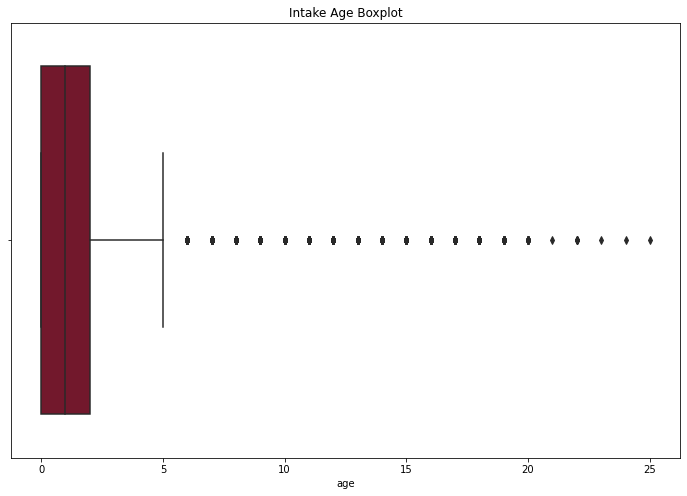

In [12]:
sns.set_palette("RdBu", 26)
plt.figure(figsize=(12,8))

sns.boxplot(data=result_2, x="age_upon_intake",dodge=False)
plt.title('Intake Age Boxplot')
plt.xlabel('age')


Text(0.5, 0, 'age')

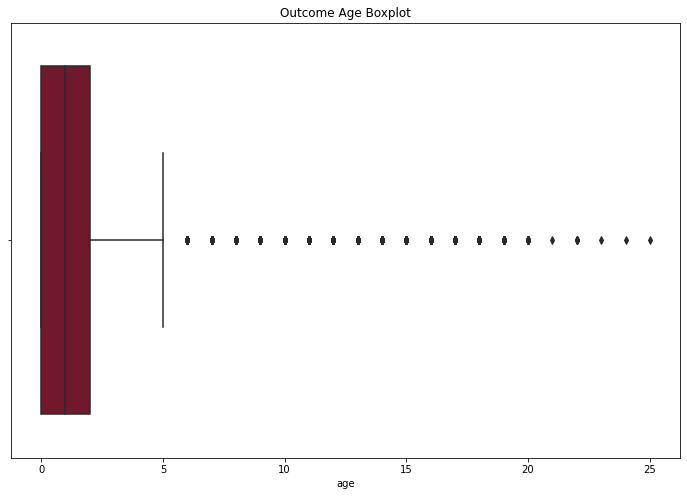

In [13]:
sns.set_palette("RdBu", 26)
plt.figure(figsize=(12,8))

sns.boxplot(data=result_2, x="age_upon_outcome")
plt.title('Outcome Age Boxplot')
plt.xlabel('age')

            Q2: Does animal's health condition upon entering shelter have an impact on its adoption rate?

Now let's analyse the outcome_condition variable which represents the state in which the animal arrived in the shelter.
As we can see below some of the categories are so rare we can put them all in the 'other' category. The normal category means that majority of animals arrive at the shelter in good health. The next most counted category is injured.

Text(0.5, 0, 'animal condition upon arrival')

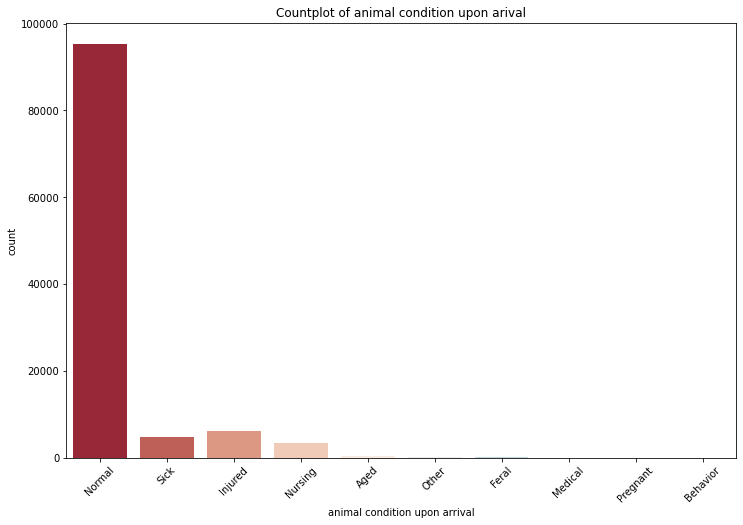

In [14]:
plt.figure(figsize=(12,8))
sns.set_palette("RdBu", 10)
plt.title('Countplot of animal condition upon arival')
chart = sns.countplot(data = result_2, x = 'outcome_condition')
plt.xticks(rotation=45)
plt.xlabel('animal condition upon arrival')


Let's map the other category

In [15]:
result_2['outcome_condition'] = result_2['outcome_condition'].map({'Normal':'Normal','Sick':'Sick','Injured':'Injured','Nursing':'Nursing','Aged':'Other','Other':'Other', 'Feral':"Other", 'Medical':"Other", 'Pregnant':'Other', 'Behavior':'Other'})


Text(0.5, 1.0, 'Countplot of animal condition upon arival')

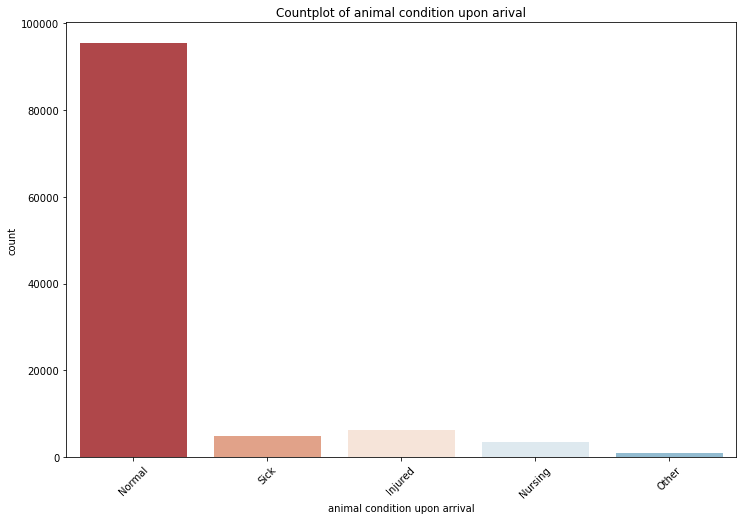

In [16]:
plt.figure(figsize=(12,8))
sns.set_palette("RdBu", 6)
chart = sns.countplot(data = result_2, x = 'outcome_condition')
plt.xticks(rotation=45)
plt.xlabel('animal condition upon arrival')
plt.title('Countplot of animal condition upon arival')

Now we can verify the dependency between outcome_condition and adoption rate.

We can first plot a basic countplot to see the distribution of the data across adopted and not adopted categories. As we can see there's a large discrepancy between the number of animals in each category. We should try the realitev percentage difference between Adopted and not adopted animals per animal's state category again as in the age example. We could also try the violinplot to look at the distributions across categories.

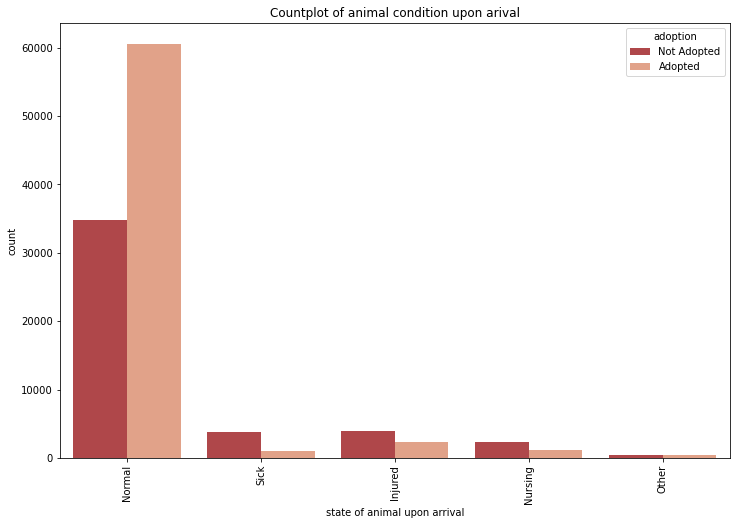

In [17]:
sns.set_palette("RdBu", 6)
plt.figure(figsize=(12,8))
chart = sns.countplot(data = result_2, x = 'outcome_condition', hue = 'outcome_type')
plt.xticks(rotation=90)
plt.xlabel('state of animal upon arrival')
plt.ylabel('count')
plt.title('Countplot of animal condition upon arival')
plt.legend(['Not Adopted',"Adopted"],title=('adoption'))


In [18]:
diff = result_2[['outcome_condition','outcome_type']]
diff = diff.groupby(['outcome_condition','outcome_type'],as_index=False).size()

dif = diff.pivot(index='outcome_condition', columns='outcome_type', values = 'size')
dif = dif.fillna(0)
sum_ = dif[0.0]+dif[1.0]
no = dif[0.0]
dif_1 = dif[1.0].sub(dif[0.0],fill_value=0).reset_index(name='sub_quantity')

dif_1.index = ['Injured','Normal','Nursing','Other','Sick']
no.index = ['Injured','Normal','Nursing','Other','Sick']

dif = pd.concat([dif,dif_1,sum_],axis=1)
dif.columns = ['Not Adopted','Adopted','outcome_condition','sub_quantity',  'sum']

dif


,Not Adopted,Adopted,outcome_condition,sub_quantity,sum
Injured,3926,2360,Injured,-1566,6286
Normal,34807,60565,Normal,25758,95372
Nursing,2368,1106,Nursing,-1262,3474
Other,424,441,Other,17,865
Sick,3856,1073,Sick,-2783,4929


As there is a big discrepancy in sample sizes between normal category and the other categories, we will start our analysis comparing sick, injured, nursing and other categories as they are fairly equally distributed. Sick animals are the least likely to be adopted followed by nursing animals, injured and other. We can assume that sick animals often include seriously, chronically sick and disabled animals who usually have special needs and require additional care which could impact people's willingness to adopt them. Injured animals have higher chances of healing as these are usually broken limbs, ect. These animals are more likely to be adopted since they are more likely to heal completely by the time of their adoption. When we see this we can look at the Normal category which is disproportionatelly high compared to other categories. It is probably caused by the size of normal animal's sample. Nevertheless, looking at other categories we can definetely assume that normal animals have higher chances of getting adopted.

Text(0, 0.5, '[%]')

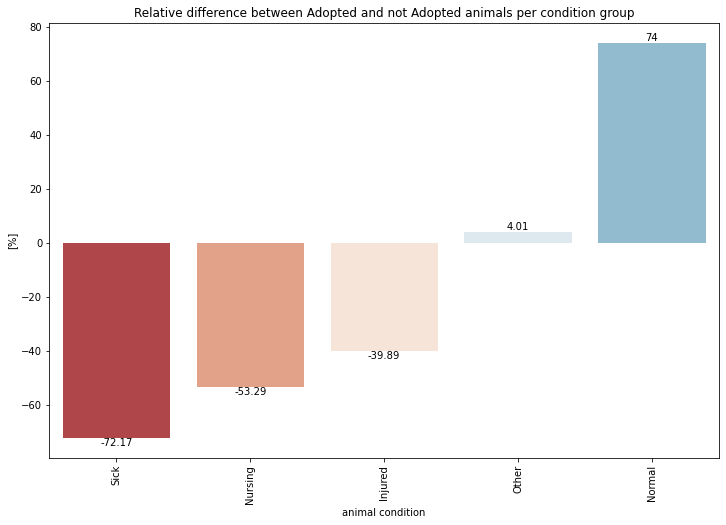

In [19]:
plt.figure(figsize=(12,8))
y = round(dif["sub_quantity"]/dif['Not Adopted'],2).sort_values(ascending = True)
y
g = sns.barplot(data=dif, x="outcome_condition", y=round(dif["sub_quantity"]/dif['Not Adopted']*100,2), order=y.index)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals per condition group')
plt.xlabel('animal condition')
plt.ylabel('[%]')

W can also perform Pearson’s chi-squared test to determine whether there is a significant association between two categorical variables in the data. The test involves two hypotheses (H0 & H1):

H0 : The two categorical variables (animals health condition and Adoption)have no relationship (independent)
H1 : There is a relationship (dependent) between two categorical variables

In [20]:
tab = pd.crosstab(result_2.outcome_condition, result_2.outcome_type, margins = True)
tab.columns = ['Not Adopted','Adopted','Row_total']
observed = tab.iloc[0:5,0:2]
expected =  np.outer(tab["Row_total"][0:5],
                     tab.loc["All"][0:2]) / 110479
expected = pd.DataFrame(expected)
 
expected.columns = ['Not Adopted','Adopted']
tab


,Not Adopted,Adopted,Row_total
outcome_condition,,,
Injured,3926,2360,6286
Normal,34807,60565,95372
Nursing,2368,1106,3474
Other,424,441,865
Sick,3856,1073,4929
All,45381,65545,110926


Let's double check whether the nan values are really omitted... Based on the shape of result_2, yes they do.

In [21]:
result_2.shape

(110926, 12)

In [22]:
observed


,Not Adopted,Adopted
outcome_condition,,
Injured,3926,2360
Normal,34807,60565
Nursing,2368,1106
Other,424,441
Sick,3856,1073


In [23]:
expected.index = ['Injured','Normal','Nursing','Other','Sick']
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

5884.740129936932


In [29]:

critical_value= scipy.stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   
 
print("Critical value:",critical_value)
# degrees of freedom equal (26-1)*(2-1)
p_value = 1 - scipy.stats.chi2.cdf(x=chi_squared_stat,  
                             df=4)
print("P value:",p_value)

Critical value: 9.487729036781154
P value: 0.0


There is a significant dependency between animal's health and its adoption rate since p<0.05

In [30]:
result_2.to_csv('shelter_cleaned.csv',index=False)

In [31]:
result_2 = pd.read_csv('shelter_cleaned.csv')


                    Q3: Does animal's reason for entering shelter have an impact on its adoption rate

Now we can verify whether the reason the animal ended up in a shelter has an impact on animals adoption chances.
As we can see in the plot below, Stray animals make the majority of animal intakes in the shelter. Right behind it is an owner surrender and Public assist.

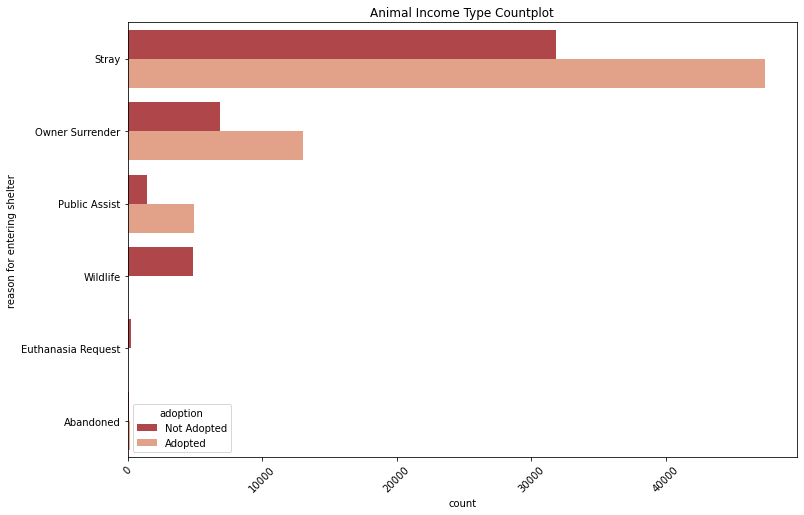

In [32]:
sns.set_palette("RdBu", 6)
plt.figure(figsize=(12,8))
sns.countplot(data = result_2, y = 'income_type', hue = 'outcome_type')
plt.ylabel('reason for entering shelter')
plt.xticks(rotation=45)
plt.xlabel('count')
plt.title('Animal Income Type Countplot')
plt.legend(['Not Adopted',"Adopted"],title=('adoption'))

Let's put Abandoned Euthanasia and Wildlife in the same category since there's not much variability there.

In [33]:
result_2['income_type'] = result_2['income_type'].map({'Abandoned':'Other','Euthanasia Request':'Other','Wildlife':'Other',
'Public Assist':'Public Assist','Owner Surrender':'Owner Surrender','Stray':'Stray'})


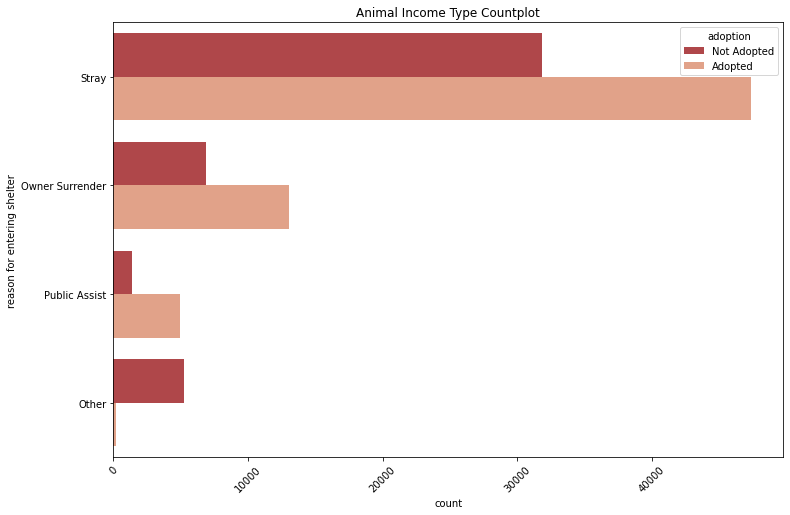

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(data = result_2, y = 'income_type', hue = 'outcome_type')
plt.ylabel('reason for entering shelter')
plt.title('Animal Income Type Countplot')
plt.xticks(rotation=45)
plt.xlabel('count')
plt.legend(['Not Adopted',"Adopted"],title=('adoption'))

We Can now verify the relative difference between adopted and not adopted animals in each income type group.

In [35]:
diff = result_2[['income_type','outcome_type']]
diff = diff.groupby(['income_type','outcome_type'],as_index=False).size()

dif = diff.pivot(index='income_type', columns='outcome_type', values = 'size')
dif = dif.fillna(0)
sum_ = dif[0.0]+dif[1.0]
no = dif[0.0]
dif_1 = dif[1.0].sub(dif[0.0],fill_value=0).reset_index(name='sub_quantity')

dif_1.index = ['Other','Owner Surrender','Public Assist','Stray']
no.index = ['Other','Owner Surrender','Public Assist','Stray']

dif = pd.concat([dif,dif_1,sum_],axis=1)
dif.columns = ['Not Adopted','Adopted','income_type','sub_quantity',  'sum']

dif

,Not Adopted,Adopted,income_type,sub_quantity,sum
Other,5219,186,Other,-5033,5405
Owner Surrender,6901,13028,Owner Surrender,6127,19929
Public Assist,1415,4961,Public Assist,3546,6376
Stray,31846,47370,Stray,15524,79216


Now we can see that animals in the Other category are 96 % more likely to  not get adopted. That's probably mostly because it consists of animals left for euthanasia, wildlife and abandoned animals. Second least popular category consists of stray animals who are getting adopted 50% more than not. Public assist animals have the best chances at getting adopted with 250% relative difference. 

Text(0, 0.5, '[%]')

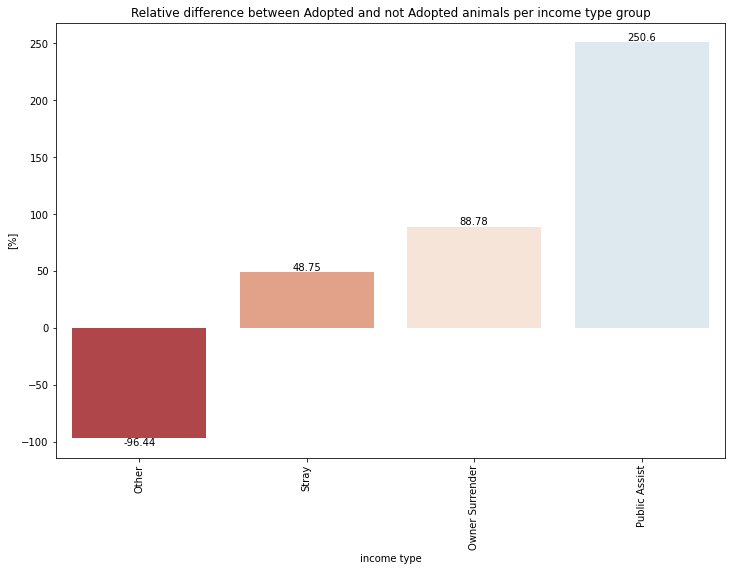

In [36]:
plt.figure(figsize=(12,8))
y = round(dif["sub_quantity"]/dif['Not Adopted'],2).sort_values(ascending = True)
y
g = sns.barplot(data=dif, x="income_type", y=round(dif["sub_quantity"]/dif['Not Adopted']*100,2), order=y.index)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals per income type group')
plt.xlabel('income type')
plt.ylabel('[%]')

                        Q4: Does animal's type  have an impact on its adoption rate?

Now we can verify whether the animal type  has an impact on animals adoption chances. We'll include birds and livestock in the other category since we believe they all have small chances of adoption either way. As we can see below, dogs and cats make the biggest portion of shelter animals.


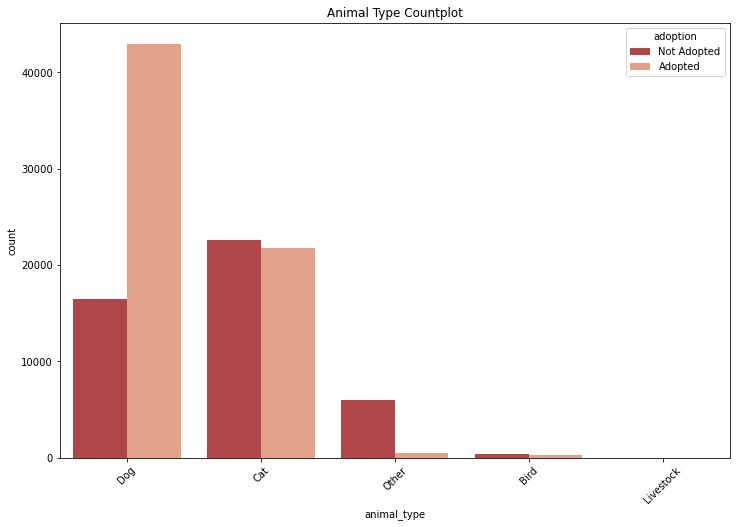

In [37]:

sns.set_palette("RdBu", 6)
plt.figure(figsize=(12,8))
sns.countplot(data = result_2, x = 'animal_type', hue = 'outcome_type')
plt.xlabel('animal_type')
plt.xticks(rotation=45)
plt.ylabel('count')

plt.title('Animal Type Countplot')
plt.legend(['Not Adopted',"Adopted"],title=('adoption'))

Now let's map Birds and Livestock as Other and run the countplot again. We can already see that the chances that the cat will get adopted are around 50/50 and that dogs have better chances than that. The animals in the other category have almost no chances of adoption.

In [38]:
result_2['animal_type'] = result_2['animal_type'].map({'Dog':'Dog','Cat':'Cat','Other':'Other',
'Bird':'Other','Livestock':'Other'})


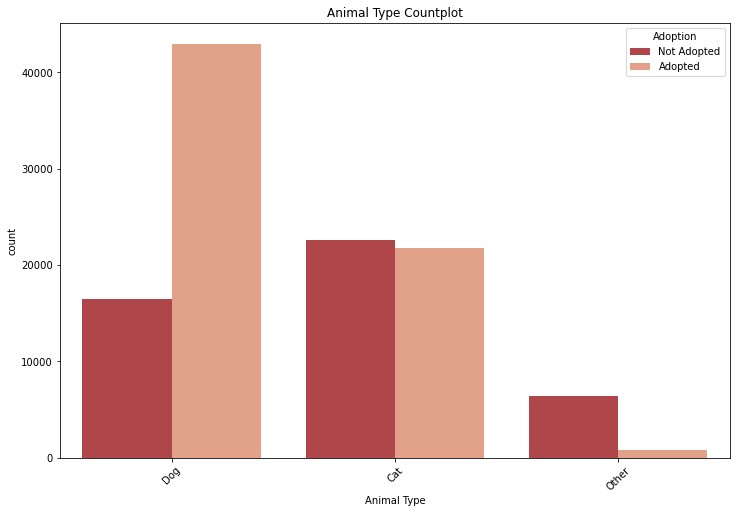

In [39]:
sns.set_palette("RdBu", 6)

plt.figure(figsize=(12,8))
sns.countplot(data = result_2, x = 'animal_type', hue = 'outcome_type')
plt.xlabel('animal_type')
plt.xticks(rotation=45)
plt.ylabel('count')
plt.xlabel('Animal Type')
plt.title('Animal Type Countplot')
plt.legend(['Not Adopted',"Adopted"],title=('Adoption'))

Let's check the relative difference for each group.

In [40]:
diff = result_2[['animal_type','outcome_type']]
diff = diff.groupby(['animal_type','outcome_type'],as_index=False).size()

dif = diff.pivot(index='animal_type', columns='outcome_type', values = 'size')
dif = dif.fillna(0)
sum_ = dif[0.0]+dif[1.0]
no = dif[0.0]
dif_1 = dif[1.0].sub(dif[0.0],fill_value=0).reset_index(name='sub_quantity')

dif_1.index = ['Cat','Dog','Other']
no.index = ['Cat','Dog','Other']

dif = pd.concat([dif,dif_1,sum_],axis=1)
dif.columns = ['Not Adopted','Adopted','animal_type','sub_quantity',  'sum']

dif

,Not Adopted,Adopted,animal_type,sub_quantity,sum
Cat,22561,21771,Cat,-790,44332
Dog,16426,42978,Dog,26552,59404
Other,6394,796,Other,-5598,7190


As we can see below, dogs are in the best situation for adoption with 161% more adopted dogs than not adopted in the researched period of time. As for cats it's pretty much 50/50 chance for them. When we look at the other animals, as we predicted, they are in the worst situation since there's 87% more not adopted animals than adopted.

Text(0, 0.5, 'relative difference [%]')

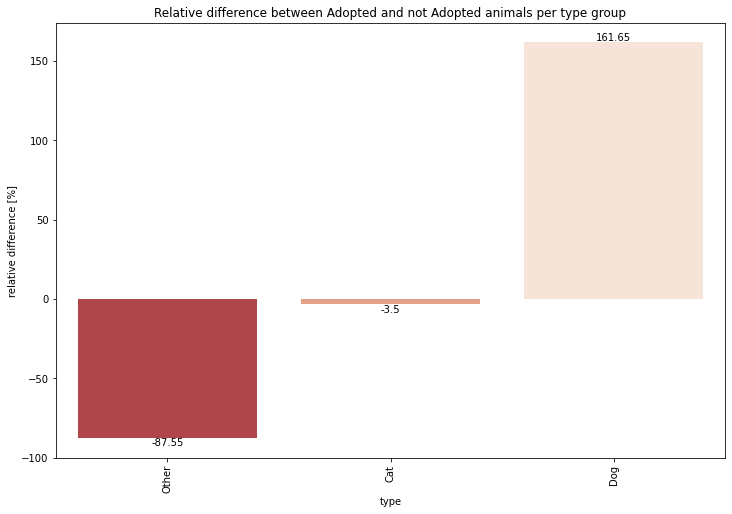

In [41]:
plt.figure(figsize=(12,8))
y = round(dif["sub_quantity"]/dif['Not Adopted'],2).sort_values(ascending = True)
y
g = sns.barplot(data=dif, x="animal_type", y=round(dif["sub_quantity"]/dif['Not Adopted']*100,2), order=y.index)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals per type group')
plt.xlabel('type')
plt.ylabel('relative difference [%]')

                Q5: Is there a difference between adoption rate of spayed and unspayed females? 

To answer this question let's take a look at the countplot of spayed and intact female animals. From the plot below we can already conclude that more intact females come to the shelter than spayed ones which makes a lot of sense. People who invest in spaying their animals are probably less inclined to give them up for adoption. As for the difference between adoption rate for spayed and intact females, it is not clear by looking at the plot so let's verify it by looking at relaive difference for each group.

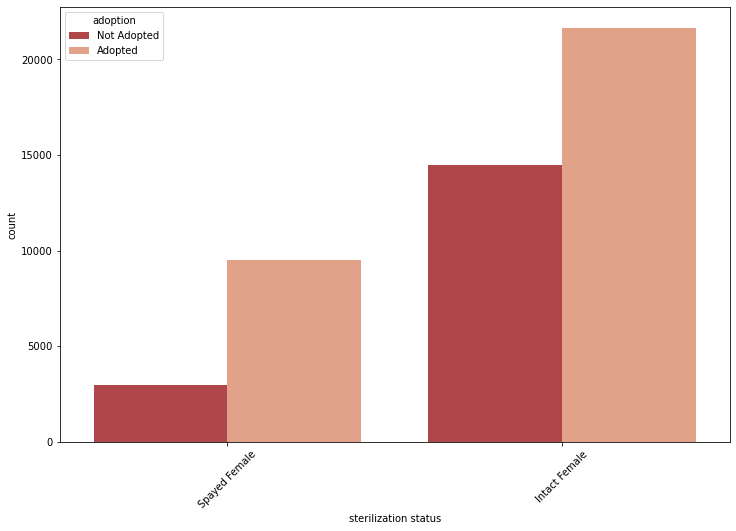

In [43]:
order= ['Spayed Female', 'Intact Female']
plt.figure(figsize=(12,8))
sns.countplot(data = result_2, x = 'sex_upon_outcome', hue = 'outcome_type', order=order)
plt.xlabel('sterilization status')
plt.xticks(rotation=45)
plt.ylabel('count')
plt.legend(['Not Adopted',"Adopted"],title=('adoption'))

In [44]:
diff = result_2[['sex_upon_outcome','outcome_type']]
diff = diff.groupby(['sex_upon_outcome','outcome_type'],as_index=False).size()

dif = diff.pivot(index='sex_upon_outcome', columns='outcome_type', values = 'size')
dif = dif.fillna(0)
sum_ = dif[0.0]+dif[1.0]
no = dif[0.0]
dif_1 = dif[1.0].sub(dif[0.0],fill_value=0).reset_index(name='sub_quantity')

dif_1.index = [ 'Intact Female','Intact Male','Neutered Male','Spayed Female']
no.index = ['Intact Female','Intact Male','Neutered Male','Spayed Female']

dif = pd.concat([dif,dif_1,sum_],axis=1)
dif.columns = ['Not Adopted','Adopted','sex_upon_outcome','sub_quantity',  'sum']

dif

,Not Adopted,Adopted,sex_upon_outcome,sub_quantity,sum
Intact Female,14500,21658,Intact Female,7158,36158
Intact Male,14311,23303,Intact Male,8992,37614
Neutered Male,3679,10731,Neutered Male,7052,14410
Spayed Female,2991,9533,Spayed Female,6542,12524


We can see below that there are 218% more adopted than not adopted spayed females. The difference is a lot less apparent in intact females where there's  only 49% difference. We can conclude from that that people are more likely to adopt an animal that has been spayed.

Text(0, 0.5, 'relative difference [%]')

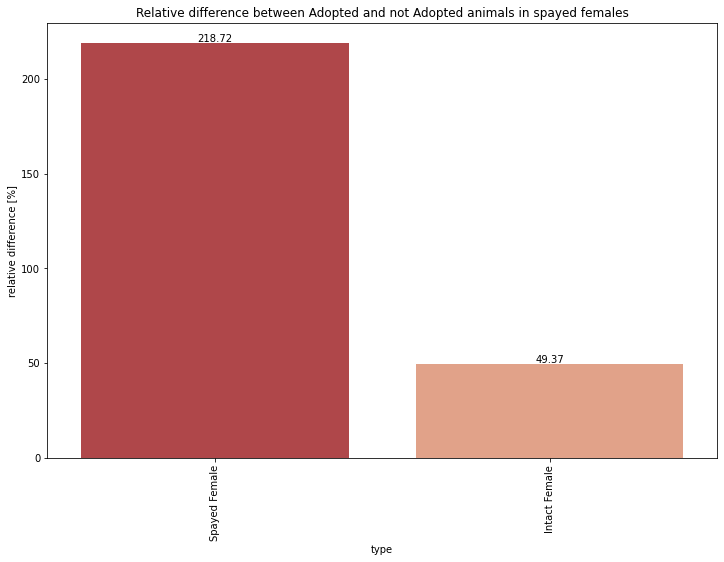

In [46]:
plt.figure(figsize=(12,8))
y = round(dif["sub_quantity"]/dif['Not Adopted'],2).sort_values(ascending = True)
y
g = sns.barplot(data=dif, x="sex_upon_outcome", y=round(dif["sub_quantity"]/dif['Not Adopted']*100,2), order=order)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals in spayed females')
plt.xlabel('type')
plt.ylabel('relative difference [%]')

                Q6: Is there a difference between adoption rate of neutered and not neutered males?

 Now let's go ahead check the males. Looking at the plot below, we can again conlude that intact males make a majority of the animals in the shelter.

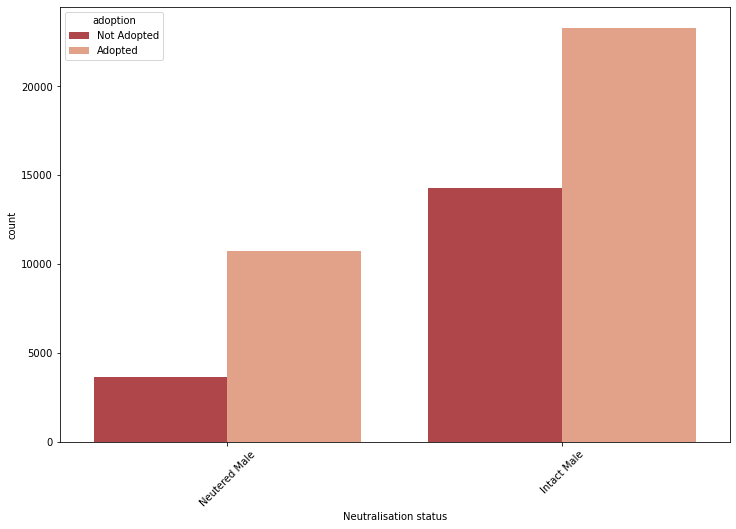

In [48]:
order= ['Neutered Male', 'Intact Male']
plt.figure(figsize=(12,8))
sns.countplot(data = result_2, x = 'sex_upon_outcome', hue = 'outcome_type', order=order)
plt.xlabel('Neutralisation status')
plt.xticks(rotation=45)
plt.ylabel('count')
plt.legend(['Not Adopted',"Adopted"],title=('adoption'))

                Q7: Is there a difference between males and females when it comes to adoption rate?

As we can see below there's 191% more adopted neutered males than not adopted. When we compare that percentage with 218% in spayed females we can conclude that when it comes to sex and adoption, it is more important for people for female animals to be spayed than for male animals to be neutered. Looking at the percentages for intact male and females we can deduct that it's less of a problem for people when a male animal is intact (there's 62 % more adopted than not adopted in this category) than when a female animal is intact (there's 49 % more adopted than not adopted in this category). 

Text(0, 0.5, 'relative difference [%]')

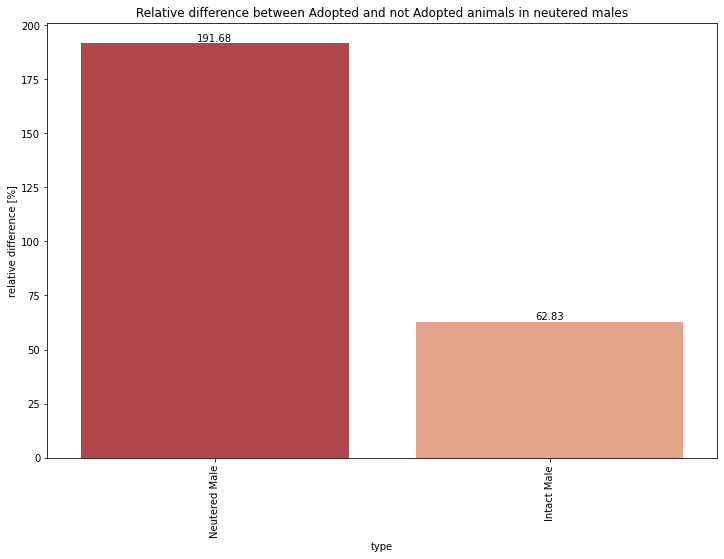

In [51]:
plt.figure(figsize=(12,8))
y = round(dif["sub_quantity"]/dif['Not Adopted'],2).sort_values(ascending = True)
y
g = sns.barplot(data=dif, x="sex_upon_outcome", y=round(dif["sub_quantity"]/dif['Not Adopted']*100,2), order=order)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals in neutered males')
plt.xlabel('type')
plt.ylabel('relative difference [%]')

                    Q7: Does the color of an animal affect its adoption chances?



To do answer this question, let's take into consideration only 10 most popular colors. As we can see the most popular colour is a mix of Black and White (22%) followed by pure black (18%) and Brown Tabby (13%)

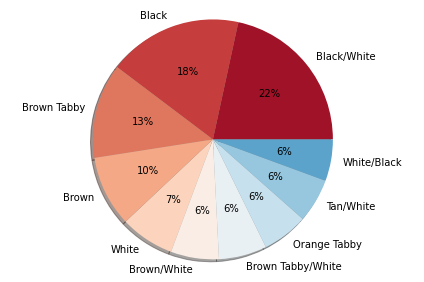

In [74]:
fig1, ax1 = plt.subplots()
s = result_2['color'].value_counts().iloc[:10]

patches, texts, autotexts = ax1.pie(s, labels = s.index,shadow=True,   autopct='%.0f%%')

for autotext in autotexts:
    autotext.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()

Let's check the relative difference in adoption for each of these colors.

In [53]:
diff = result_2[['color','outcome_type']]
diff = diff.groupby(['color','outcome_type'],as_index=False).size()

dif = diff.pivot(index='color', columns='outcome_type', values = 'size')
dif = dif.fillna(0)
sum_ = dif[0.0]+dif[1.0]
no = dif[0.0]
dif_1 = dif[1.0].sub(dif[0.0],fill_value=0).reset_index(name='sub_quantity')

dif_1.index = diff.color.unique()
no.index = diff.color.unique()

dif = pd.concat([dif,dif_1,sum_],axis=1)
dif.columns = ['Not Adopted','Adopted','sex_upon_outcome','sub_quantity',  'sum']
dif = dif.sort_values(by=['sum'],ascending=False).iloc[:10]
dif


,Not Adopted,Adopted,sex_upon_outcome,sub_quantity,sum
Black/White,4319.0,7119.0,Black/White,2800.0,11438.0
Black,4583.0,5010.0,Black,427.0,9593.0
Brown Tabby,3554.0,3204.0,Brown Tabby,-350.0,6758.0
Brown,3313.0,1746.0,Brown,-1567.0,5059.0
White,1443.0,2425.0,White,982.0,3868.0
Brown/White,981.0,2451.0,Brown/White,1470.0,3432.0
Brown Tabby/White,1687.0,1739.0,Brown Tabby/White,52.0,3426.0
Orange Tabby,1726.0,1551.0,Orange Tabby,-175.0,3277.0
Tan/White,889.0,2256.0,Tan/White,1367.0,3145.0
White/Black,1081.0,1886.0,White/Black,805.0,2967.0


As we can see below, the most popular colours for adoptions are tan/white with 153% more adopted animals than not adopted in this group. The least popular animal colour seems to be brown with 47% more not adopted animals than adopted. As we could see below, brown tabby is the third most common colour/pattern. This might be the reason why it's not that popular among adoption prospects. On top of that, our assumption would be that tabby animals (usually cats) are considered to be mixed or 'not pure' breed which leads people to adopt animals of one color which are considered pure breed.

Text(0, 0.5, 'relative difference [%]')

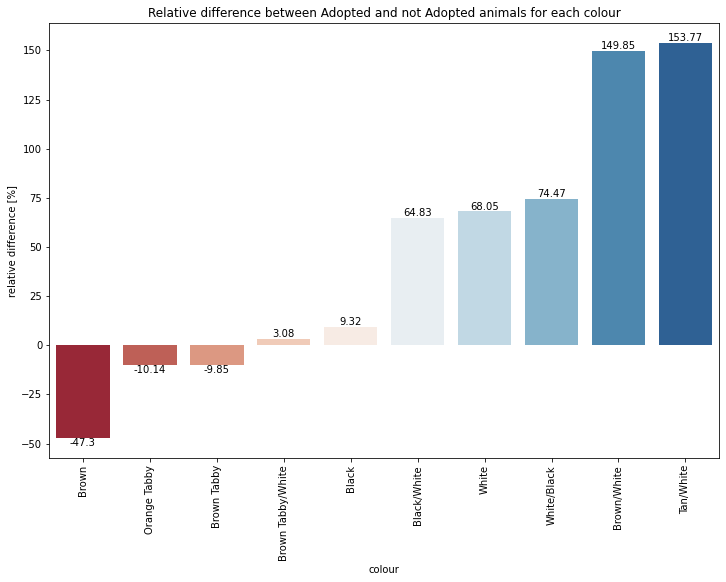

In [55]:
sns.set_palette("RdBu", 10)
plt.figure(figsize=(12,8))
y = round(dif["sub_quantity"]/dif['Not Adopted']*100,2).sort_values(ascending = True)
y
g = sns.barplot(data=dif, x="sex_upon_outcome", y=y, order=y.index)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals for each colour')
plt.xlabel('colour')
plt.ylabel('relative difference [%]')

                            Q8: Does a  breed of an animal affects its adoption chances?


To answer this question, let's take into consideration only 10 most common breeds in the shelter. As we can see below, domestic shorthair mix (46%) and domestic shorthair (11%) are the most common breeds followed by pitbull mix (10%). Domestic animals make the biggest portion of the sum. These are the specimen that are so mixed, they don't resemble any of the common races. This definition makes it easy to understand why they are the majority in the shelter. These are usually animals born on the streets concieved by other domestic dogs.

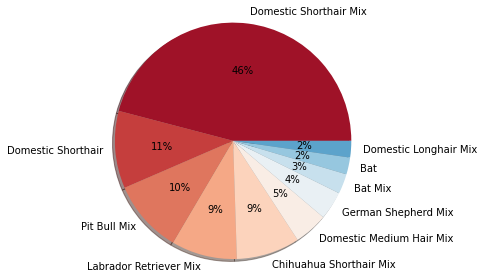

In [76]:

fig1, ax1 = plt.subplots()
s = result_2['breed'].value_counts().iloc[:10]

patches, texts, autotexts = ax1.pie(s, labels = s.index,shadow=True,   autopct='%.0f%%')

for autotext in autotexts:
    autotext.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()

As we can see below, domestic animals might have lower chances for adoption as the differences between adopted and not adopted animals are almost nonexistent.

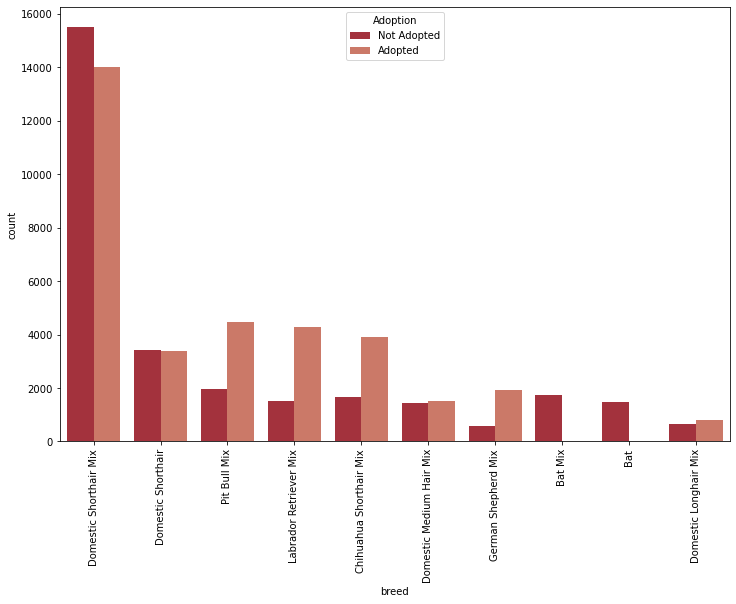

In [64]:
plt.figure(figsize=(12,8))
sns.set_palette("RdBu", 8)
chart = sns.countplot(data = result_2, x = 'breed', order=pd.value_counts(result_2['breed']).iloc[:10].index, hue= 'outcome_type')
plt.xticks(rotation=90)
plt.legend(['Not Adopted',"Adopted"],title=('Adoption'))

Let's verify above hypotheses by plotting relative difference in adopton for each breed.

In [66]:
diff = result_2[['breed','outcome_type']]
diff = diff.groupby(['breed','outcome_type'],as_index=False).size()

dif = diff.pivot(index='breed', columns='outcome_type', values = 'size')
dif = dif.fillna(0)
sum_ = dif[0.0]+dif[1.0]
no = dif[0.0]
dif_1 = dif[1.0].sub(dif[0.0],fill_value=0).reset_index(name='sub_quantity')

dif_1.index = diff.breed.unique()
no.index = diff.breed.unique()

dif = pd.concat([dif,dif_1,sum_],axis=1)
dif.columns = ['Not Adopted','Adopted','sex_upon_outcome','sub_quantity',  'sum']
dif = dif.sort_values(by=['sum'],ascending=False).iloc[:10]
dif

,Not Adopted,Adopted,sex_upon_outcome,sub_quantity,sum
Domestic Shorthair Mix,15495.0,14011.0,Domestic Shorthair Mix,-1484.0,29506.0
Domestic Shorthair,3410.0,3386.0,Domestic Shorthair,-24.0,6796.0
Pit Bull Mix,1966.0,4476.0,Pit Bull Mix,2510.0,6442.0
Labrador Retriever Mix,1495.0,4276.0,Labrador Retriever Mix,2781.0,5771.0
Chihuahua Shorthair Mix,1674.0,3904.0,Chihuahua Shorthair Mix,2230.0,5578.0
Domestic Medium Hair Mix,1450.0,1514.0,Domestic Medium Hair Mix,64.0,2964.0
German Shepherd Mix,583.0,1914.0,German Shepherd Mix,1331.0,2497.0
Bat Mix,1754.0,0.0,Bat Mix,-1754.0,1754.0
Bat,1485.0,0.0,Bat,-1485.0,1485.0
Domestic Longhair Mix,647.0,809.0,Domestic Longhair Mix,162.0,1456.0


As we can see below we can confirm my previous assumption that domestic mix animals have the least chances of adoption (except for bats which have no chances). If an animal is mixed but resembles some popular breed it has high chances of adoption. In this case for example, there are 228% more adoptions among German Shepherd breed and 186% more adoptions in Labrador Retriever mix. 

Text(0, 0.5, 'relative difference [%]')

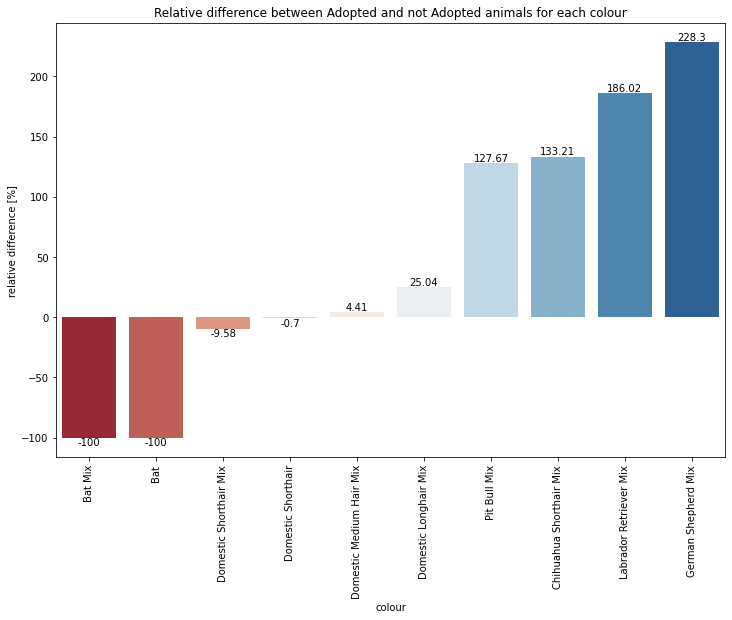

In [68]:
sns.set_palette("RdBu", 10)
plt.figure(figsize=(12,8))
y = round(dif["sub_quantity"]/dif['Not Adopted']*100,2).sort_values(ascending = True)
y
g = sns.barplot(data=dif, x="sex_upon_outcome", y=y, order=y.index)
plt.xticks(rotation=90)
g.bar_label(g.containers[0])
plt.title('Relative difference between Adopted and not Adopted animals for each colour')
plt.xlabel('colour')
plt.ylabel('relative difference [%]')

                Q9. Does the time spent in the shelter affect the adoption rate of the animals? 

To answer this question, let's first create a new column named years_in_shelter by substracting age upon outcome from age upon intake columns.

In [69]:
result_2['years_in_shelter'] = result_2['age_upon_outcome'] - result_2['age_upon_intake']


Let's save this new dataframe to shelter_cleaned.csv

In [70]:
result_2.to_csv('shelter_cleaned.csv')

Now, let's verify if the column did appear by printing the head of our table.

In [71]:
result_2.head()

,datetime,income_type,outcome_condition,animal_type,sex_upon_outcome,age_upon_intake,breed,color,datetime_outcome,date_of_birth,outcome_type,age_upon_outcome,years_in_shelter
0,2019-01-03 16:19:00,Stray,Normal,Dog,Neutered Male,2,Beagle Mix,Tricolor,2019-01-08 15:11:00,2017-01-03 00:00:00,0,2,0
1,2015-07-05 12:59:00,Stray,Normal,Dog,Spayed Female,8,English Springer Spaniel,White/Liver,2015-07-05 15:13:00,2007-07-05 00:00:00,1,8,0
2,2016-04-14 18:43:00,Stray,Normal,Dog,Intact Male,0,Basenji Mix,Sable/White,2016-04-21 17:17:00,2015-04-17 00:00:00,1,1,1
3,2013-10-21 07:59:00,Stray,Sick,Cat,Intact Female,0,Domestic Shorthair Mix,Calico,2013-10-21 11:39:00,2013-09-21 00:00:00,0,0,0
4,2014-06-29 10:38:00,Stray,Normal,Dog,Neutered Male,4,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-07-02 14:16:00,2010-06-29 00:00:00,1,4,0


We can verify the variability of animals' ages by printing a pie chart. As we can see below, most of the animals don't spend more than one year at the shelter so there's not enough variability to test this question. 

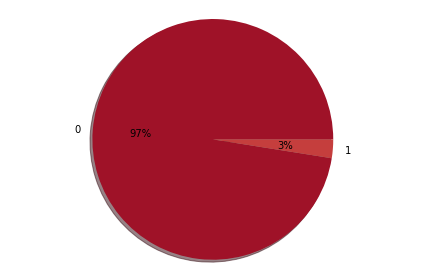

In [77]:

fig1, ax1 = plt.subplots()
s = result_2['years_in_shelter'].value_counts().iloc[:2]

patches, texts, autotexts = ax1.pie(s, labels = s.index,shadow=True,   autopct='%.0f%%')

for autotext in autotexts:
    autotext.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()

                                            4. Inferences and Conclusions

* Does age affect animal's adoption rate?

We can conclude that most of the animals do end up getting adopted no matter their age. Nevertheless, there are slight differences in their chances to do so. For example, animals aged 8 are less likely to get adopted than animals aged 7.  The same situation happens with ages 4 and 5, 14 and 15, 11 and 13. We can assume that the older the animal the smaller the chances of adoption.
* Does animal's health condition upon entering shelter have an impact on its adoption rate?

Sick animals are the least likely to be adopted followed by nursing animals, injured and other. Sick animals often include seriously, chronically sick and disabled animals who usually have special needs and require additional care which could impact people's willingness to adopt them. Injured animals have higher chances of healing as these are usually broken limbs, ect. These animals are more likely to be adopted since they are more likely to heal completely by the time of their adoption. Normal animals have the highest chances of getting adopted.
* Does animal's reason for entering shelter have an impact on its adoption rate?

We concluded that animals in the Other category are 96 % more likely to not get adopted than to be adopted. That's probably mostly because it consists of animals left for euthanasia, wildlife and abandoned animals. Second least popular category consists of stray animals who are getting adopted 50% more than not. Public assist animals have the best chances at getting adopted with 250% relative difference. 
* Does animal's type  have an impact on its adoption rate?

Dogs are in the best situation for adoption with 161% more adopted dogs than not adopted in the researched period of time. As for cats it's pretty much 50/50 chance for them. When we look at the other animals, as we predicted, they are in the worst situation since there's 87% more not adopted animals than adopted.
* Is there a difference between adoption rate of spayed and unspayed females? 

There are 218% more adopted than not adopted spayed females. The difference is a lot less apparent in intact females where there's  only 49% difference. We can conclude from that that people are more likely to adopt an animal that has been spayed.
* Is there a difference between adoption rate of neutered and not neutered males? 
* Is there a difference between males and females when it comes to adoption rate?

There's 191% more adopted neutered males than not adopted. When we compare that percentage with 218% in spayed females we can conclude that when it comes to sex and adoption, it is more important for people for female animals to be spayed than for male animals to be neutered. Looking at the percentages for intact male and females we can deduct that it's less of a problem for people when a male animal is intact (there's 62 % more adopted than not adopted in this category) than when a female animal is intact (there's 49 % more adopted than not adopted in this category). 
* Does the color of an animal affects its adoption chances?

The most popular colours for adoptions are tan/white with 153% more adopted animals than not adopted in this group. The least popular animal colour seems to be brown with 47% more not adopted animals than adopted. As we could see below, brown tabby is the third most common colour/pattern. This might be the reason why it's not that popular among adoption prospects. On top of that, our assumption would be that tabby animals (usually cats) are considered to be mixed or 'not pure' breed which leads people to adopt animals of one color which are considered pure breed.
* Does the breed of an animal affects its adoption chances?

Domestic mix animals have the least chances of adoption (except for bats which have no chances). If an animal is mixed but resembles some popular breed it has high chances of adoption. In this case for example, there are 228% more adoptions among German Shepherd breed and 186% more adoptions in Labrador Retriever mix. 
* Does the time spent in the shelter affect animal's adoption chances?

Most of the animals don't spend more than one year at the shelter so there's not enough variability to test this question. 